In [1]:
import pandas as pd
import numpy as np

# Rastgele veri oluşturmak için ayar
np.random.seed(42)

# Kullanıcı sayısı
num_users = 1000

# Kullanıcı ID'leri
user_ids = np.arange(1, num_users + 1)

# Ücretsiz deneme süresi (A/B testi için)
trial_periods = np.random.choice(['7 days', '14 days'], num_users)

# Onboarding türü (A/B testi için)
onboarding_types = np.random.choice(['Video', 'Interactive Guide'], num_users)

# Kullanıcıların abonelik dönüşüm oranları (rastgele)
conversion_rates = np.random.rand(num_users)

# Kullanıcıların abonelik dönüşüm durumu (1: dönüştü, 0: dönüştü değil)
conversions = (conversion_rates > 0.5).astype(int)

# Kullanıcıların isimleri (örnek isimler)
first_names = ['John', 'Jane', 'Alex', 'Emily', 'Michael', 'Sarah', 'David', 'Laura', 'Chris', 'Anna']
last_names = ['Smith', 'Johnson', 'Williams', 'Brown', 'Jones', 'Garcia', 'Miller', 'Davis', 'Rodriguez', 'Martinez']
names = [f"{np.random.choice(first_names)} {np.random.choice(last_names)}" for _ in range(num_users)]

# Veri çerçevesi oluşturma
data = {
    'UserID': user_ids,
    'Name': names,
    'TrialPeriod': trial_periods,
    'OnboardingType': onboarding_types,
    'Conversion': conversions
}

df = pd.DataFrame(data)

# CSV dosyasını kaydetme
df.to_csv('saas_ab_test_data.csv', index=False)

print("CSV dosyası oluşturuldu: saas_ab_test_data.csv")

CSV dosyası oluşturuldu: saas_ab_test_data.csv


In [2]:
import pandas as pd
from scipy import stats

# CSV dosyasını okuma
df = pd.read_csv('saas_ab_test_data.csv')

# Ücretsiz deneme süresi gruplarının dönüşüm oranlarını hesaplama
trial_conversion_rates = df.groupby('TrialPeriod')['Conversion'].mean()
print("Ücretsiz Deneme Süresi Dönüşüm Oranları:")
print(trial_conversion_rates)

# Onboarding türü gruplarının dönüşüm oranlarını hesaplama
onboarding_conversion_rates = df.groupby('OnboardingType')['Conversion'].mean()
print("\nOnboarding Türü Dönüşüm Oranları:")
print(onboarding_conversion_rates)

# İstatistiksel test: Ücretsiz deneme süresi için
group_7_days = df[df['TrialPeriod'] == '7 days']['Conversion']
group_14_days = df[df['TrialPeriod'] == '14 days']['Conversion']
t_stat_trial, p_val_trial = stats.ttest_ind(group_7_days, group_14_days)
print("\nÜcretsiz Deneme Süresi A/B Testi:")
print(f"T-İstatistiği: {t_stat_trial}, P-Değeri: {p_val_trial}")

# İstatistiksel test: Onboarding türü için
group_video = df[df['OnboardingType'] == 'Video']['Conversion']
group_interactive = df[df['OnboardingType'] == 'Interactive Guide']['Conversion']
t_stat_onboarding, p_val_onboarding = stats.ttest_ind(group_video, group_interactive)
print("\nOnboarding Türü A/B Testi:")
print(f"T-İstatistiği: {t_stat_onboarding}, P-Değeri: {p_val_onboarding}")

# Sonuçların yorumlanması
alpha = 0.05
if p_val_trial < alpha:
    print("\nÜcretsiz deneme süresi grupları arasında istatistiksel olarak anlamlı bir fark var.")
else:
    print("\nÜcretsiz deneme süresi grupları arasında istatistiksel olarak anlamlı bir fark yok.")

if p_val_onboarding < alpha:
    print("Onboarding türü grupları arasında istatistiksel olarak anlamlı bir fark var.")
else:
    print("Onboarding türü grupları arasında istatistiksel olarak anlamlı bir fark yok.")

Ücretsiz Deneme Süresi Dönüşüm Oranları:
TrialPeriod
14 days    0.535294
7 days     0.495918
Name: Conversion, dtype: float64

Onboarding Türü Dönüşüm Oranları:
OnboardingType
Interactive Guide    0.540084
Video                0.494297
Name: Conversion, dtype: float64

Ücretsiz Deneme Süresi A/B Testi:
T-İstatistiği: -1.24527955282272, P-Değeri: 0.21332130843023991

Onboarding Türü A/B Testi:
T-İstatistiği: -1.446787077948766, P-Değeri: 0.14827056914689296

Ücretsiz deneme süresi grupları arasında istatistiksel olarak anlamlı bir fark yok.
Onboarding türü grupları arasında istatistiksel olarak anlamlı bir fark yok.


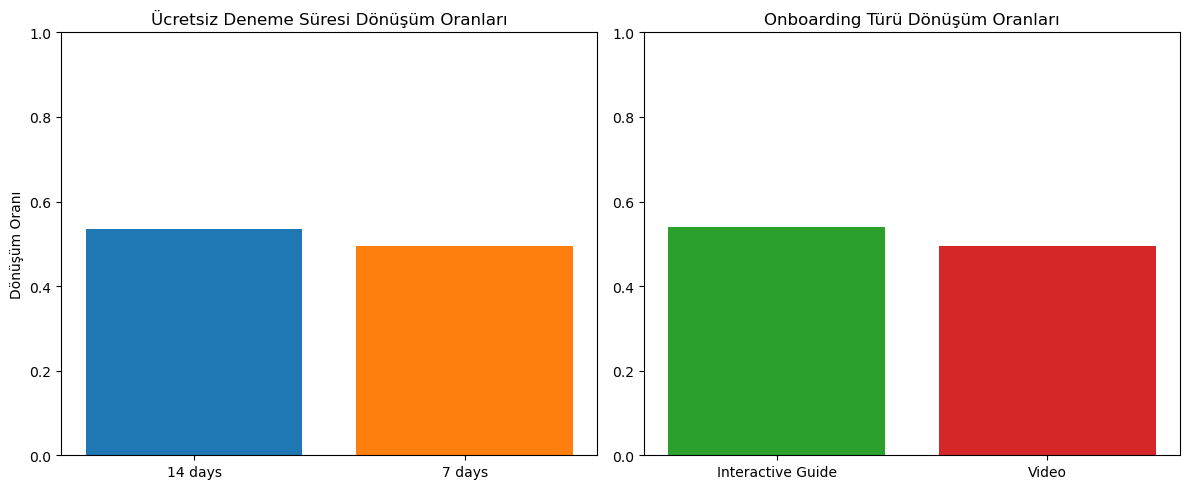

In [3]:
import matplotlib.pyplot as plt

# Dönüşüm oranları
trial_conversion_rates = df.groupby('TrialPeriod')['Conversion'].mean()
onboarding_conversion_rates = df.groupby('OnboardingType')['Conversion'].mean()

# Bar grafiği
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Ücretsiz deneme süresi dönüşüm oranları
ax[0].bar(trial_conversion_rates.index, trial_conversion_rates.values, color=['#1f77b4', '#ff7f0e'])
ax[0].set_title('Ücretsiz Deneme Süresi Dönüşüm Oranları')
ax[0].set_ylabel('Dönüşüm Oranı')
ax[0].set_ylim(0, 1)

# Onboarding türü dönüşüm oranları
ax[1].bar(onboarding_conversion_rates.index, onboarding_conversion_rates.values, color=['#2ca02c', '#d62728'])
ax[1].set_title('Onboarding Türü Dönüşüm Oranları')
ax[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

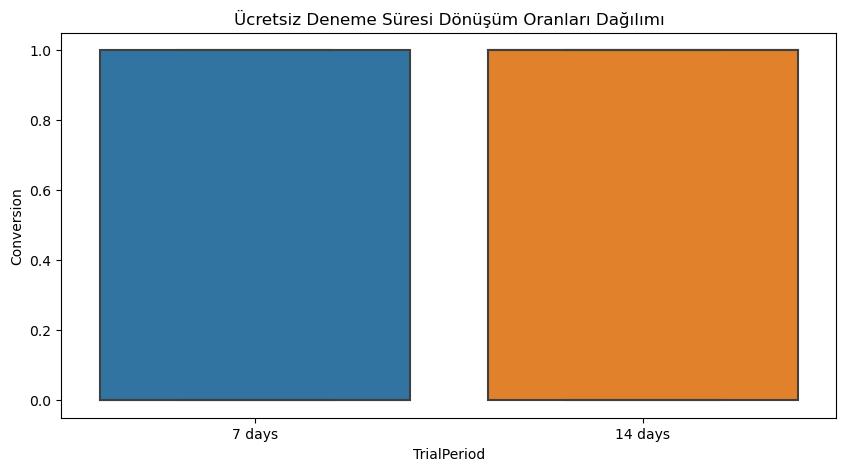

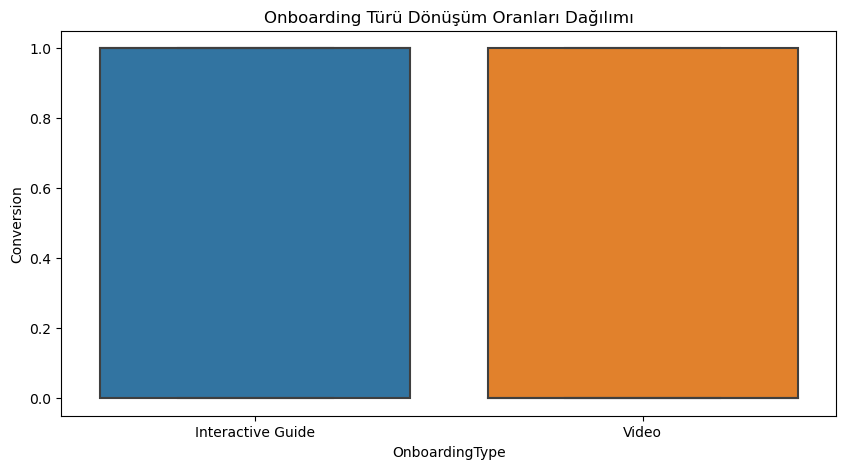

In [4]:
import seaborn as sns

# Dağılım grafiği
plt.figure(figsize=(10, 5))
sns.boxplot(x='TrialPeriod', y='Conversion', data=df)
plt.title('Ücretsiz Deneme Süresi Dönüşüm Oranları Dağılımı')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='OnboardingType', y='Conversion', data=df)
plt.title('Onboarding Türü Dönüşüm Oranları Dağılımı')
plt.show()

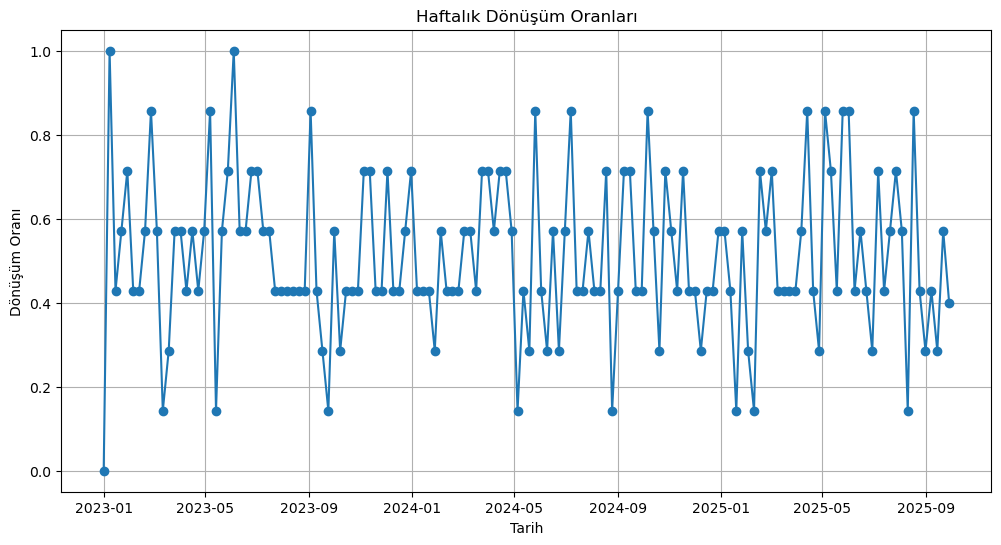

In [9]:
# Haftalık ortalama dönüşüm oranlarını hesaplama
weekly_data = df.resample('W', on='Date')['Conversion'].mean()

# Çizgi grafiği
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data.values, marker='o')
plt.title('Haftalık Dönüşüm Oranları')
plt.xlabel('Tarih')
plt.ylabel('Dönüşüm Oranı')
plt.grid(True)
plt.show()

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# İki grafiği aynı resimde birleştirme
plt.figure(figsize=(14, 6))

# Ücretsiz deneme süresi dağılımı
plt.subplot(1, 2, 1)
sns.boxplot(x='TrialPeriod', y='Conversion', data=df)
plt.title('Ücretsiz Deneme Süresi Dönüşüm Oranları Dağılımı')

# Onboarding türü dağılımı
plt.subplot(1, 2, 2)
sns.boxplot(x='OnboardingType', y='Conversion', data=df)
plt.title('Onboarding Türü Dönüşüm Oranları Dağılımı')

# Grafiği kaydetme
plt.tight_layout()
plt.savefig('combined_distribution.png', format='png', dpi=300)
plt.close()

In [11]:
# Haftalık ortalama dönüşüm oranlarını hesaplama
weekly_data = df.resample('W', on='Date')['Conversion'].mean()

# Çizgi grafiği ve kaydetme
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data.values, marker='o')
plt.title('Haftalık Dönüşüm Oranları')
plt.xlabel('Tarih')
plt.ylabel('Dönüşüm Oranı')
plt.grid(True)
plt.savefig('weekly_conversion_rates.png', format='png', dpi=300)
plt.close()